# What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
## by HAMZAT ABDULRAHMAN

## Investigation Overview
In this investigation I wanted to determine what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Summary of key Insights :
- Most of those who attended are those who didn't receive SMS.
- More female than male showed up on the day of appointment, likewise more female than male missed their appointment.
- There are more hypertensive patients who did not miss their appointment than those who missed, and the same trend goes for the diabetic and non-diabetic patients






## Dataset Overview
This dataset shows the appointmentID, patientID,gender, schedule and appointment days,as well as the medical issues of over a hundred and ten thousand patients. The information is collected from medical appointments  in Brazil,and is focused on whether or not patients show up for their appointment.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

### Preliminary wrangling

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.columns = [str(x).lower() for x in df.columns]
df.rename(columns={'hipertension':'hypertension', 'handcap':'handicap','no-show':'no_show','appointmentday':'appointment_day','scheduledday':'scheduled_day','appointmentid':'appointment_id','patientid':'patient_id'}, inplace=True)

In [4]:
#removing two columns
df = df.drop(["patient_id","appointment_id"], axis=1)

In [18]:
df['hypertension'] = df['hypertension'].astype(str)
df['diabetes'] = df['diabetes'].astype(str)
df['sms_received'] = df['sms_received'].astype(str)

df['hypertension'] = df['hypertension'].replace({'0':'non-hypertensive','1':'hypertensive'})
df['diabetes'] = df['diabetes'].replace({'0':'non-diabetic','1':'diabetic'})
df['no_show'] = df['no_show'].replace({'No':'attended','Yes':'missed'})
df['sms_received'] = df['sms_received'].replace({'0':'False','1':'True'})

## Is SMS received a predicting factor?
Most of those who attended are those who didn't receive SMS, and a higher number of those who missed appointment also goes to those who didn't receive SMS.  

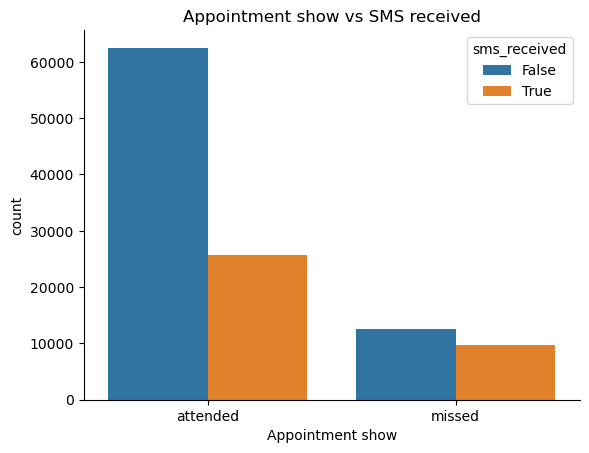

In [19]:
sb.countplot(data = df, x='no_show', hue ='sms_received');
plt.xlabel('Appointment show')
plt.title('Appointment show vs SMS received');
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
plt.show()

## Can patients gender be used to predict the overall appointment show-up responses?
More female than male showed up on the day of appointment, likewise more female than male missed their appointment.

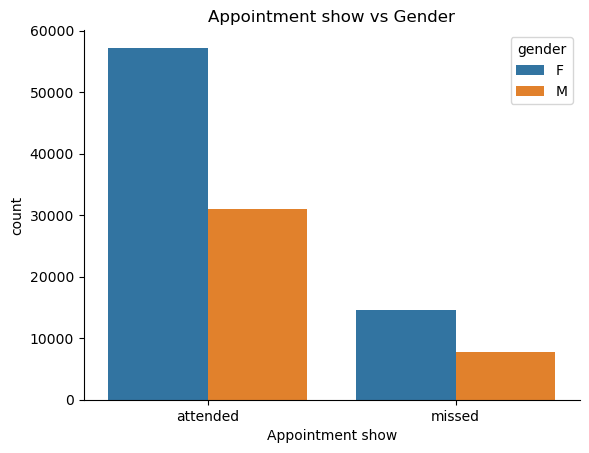

In [15]:
sb.countplot(data = df, x='no_show', hue ='gender');
plt.xlabel('Appointment show')
plt.title('Appointment show vs Gender');
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
plt.show()

## What medical issues of patients are important inorder to predict whether a patient shows-up or not?
1. There are more hypertensive patients who did not miss their appointment than those who missed. Similarly there are more non-hypertensive patients who showed up on their appointment day than those who did not.
2. The exact same trend goes for diabetic and non-diabetic patients for who attended or missed their appointment.

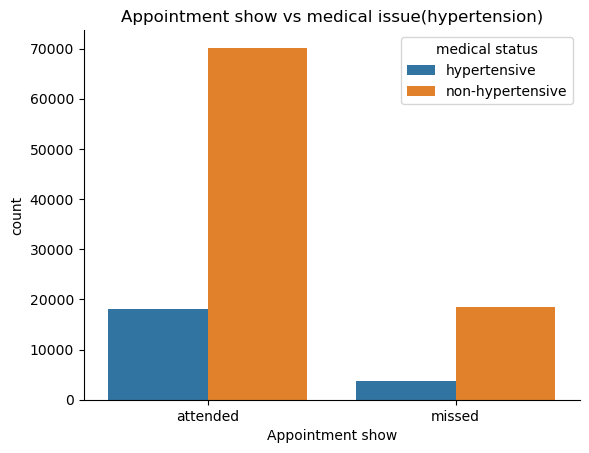

In [16]:
sb.countplot(data = df, x='no_show', hue ='hypertension');
plt.xlabel('Appointment show')
plt.title('Appointment show vs medical issue(hypertension)')
plt.legend(title='medical status')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
plt.show()

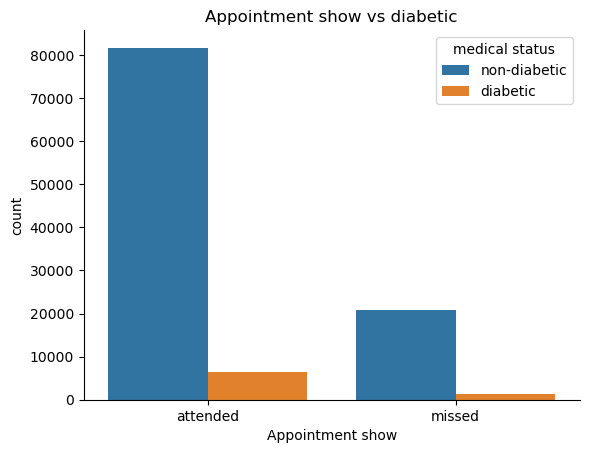

In [17]:
sb.countplot(data = df, x='no_show', hue ='diabetes');
plt.xlabel('Appointment show')
plt.title('Appointment show vs diabetic')
plt.legend(title='medical status')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
plt.show()

This presentation is still the result of a tentative research, more work can still be done to dig deeper and find more key insights...